---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

* Estudiante: **Daniel Pérez Conejo**
* Carné: **B85963**
* Grupo: **1**
    
* Estudiante: **Alonso Jiménez Villegas**
* Carné: **B94125**
* Grupo: **1**
    
* Estudiante: **Juan Diego Cerdas Angulo**
* Carné: **B81928**
* Grupo: **1**


# `P5` - *Procesos M/M/s*

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

 - La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.
 - La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

### (40%) Determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

Se tienen los siguientes datos del enunciado anterior:

- El sistema no debe exceder un total de 50 personas en fila durante el 95% del tiempo de servicio.
- La tasa de llegada tiene un valor de $\lambda = 4$ _personas por minuto_ durante las ocho horas de funcionamiento.
- La tasa de servicio de cada servidor tiene un valor de $\nu = 0.25$ _personas por minuto_ durante las ocho horas de funcionamiento.


La longitud de la fila $L_q$ viene dada por la siguiente expresión:

$$
L_q = i - 1 
$$

Tomando en cuenta una cantidad máxima de 50 personas en fila, entonces el número de pacientes en el sistema ($i$) corresponde a:

$$
i = L_q + 1 
$$

$$
i = 50 + 1 = 51
$$

La probabilidad de que haya 51 o más pacientes en el sistema viene dada por la siguiente expresión:

$$
P( \text{51 o pacientes en el sistema} ) = \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^ {51}
$$

Donde el parámetro $\rho$ está definido de la siguiente forma, donde s representa la cantidad de servidores disponibles. 

\begin{equation}
    \rho=\frac{\lambda}{s\cdot \nu}
\end{equation}

Sustituyendo esto en la expresión anterior:

$$
P( \text{51 o más pacientes en el sistema} ) = \rho^ {51} = \left( \frac{\lambda}{s \nu} \right)^{51}
$$

Se busca no sobrepasar un total de 50 personas en espera durante el 95% del tiempo; es decir, tener más de 50 pacientes en espera solo el 5% del tiempo. De esta forma, se puede establecer la siguiente expresión:

$$
\left( \frac{\lambda}{s \nu} \right)^{51} \leq 0.05 
$$

Despejando la cantidad de servidores $s$:

$$
\frac{ \lambda^{51} }{ s^{51} \nu ^{51} } \leq 0.05 
$$

$$
\frac{ \lambda^{51} }{ 0.05 \cdot \nu ^{51} } \leq s^{51}
$$

$$
s^{51} \geq \left(\frac{ \lambda }{ \nu } \right)^{51} \cdot \left(\frac{1}{0.05}\right) 
$$

$$
s \geq \left(\frac{ \lambda }{ \nu } \right) \cdot \left(\frac{1}{0.05}\right)^{\frac{1}{51}} 
$$

De los datos del enunciado, se tiene que la tasa de llegada es $\lambda = 4$ y la tasa de servicio es $\nu = 0.25$.

$$
s \geq \left(\frac{4}{0.25} \right) \cdot \left(\frac{1}{0.05}\right)^{\frac{1}{51}} = 16.97
$$

En este caso, los servidores serían personas en el centro de vacunación, por lo que solo tiene sentido hablar de números enteros. De esta forma, se redondea el número a 17 y se concluye que esta es la cantidad mínima de servidores para mantener a 50 personas en fila durante el 95% del tiempo.

### (60%) Simulación del proceso de vacunación M/M/s

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def vacunacion(s):

    '''Esta función realiza una simulación del proceso de vacunación
    Recibe como entrada en número de servidores s y grafica la
    cantidad de pacientes en el sistema a lo largo del tiempo'''

    # Número de pacientes                        ########## Cuál debería ser el número de pacientes? en ningún lado lo dicen
    N = 1900

    # Parámetro de llegada (pacientes/segundos)
    lam = 4/60

    # Parámetro de servicio (servicios/segundos)
    nu = (0.25*s)/60

    # Distribución de los tiempos de llegada entre cada paciente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada paciente
    Y = stats.expon(scale = 1/nu)

    # Intervalos entre llegadas (segundos desde último paciente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo paciente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de pacientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 51

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Número de servidores =', str(s)) 
    print('Tiempo con más de {} solicitudes en fila:'.format(P-1))      ###### Acá corregí esto a P-1 en vez de P-2
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))
    
    Title = " Simulación de vacunación para " + str(s) + " servidores."
    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))     ###### Acá corregí esto a P-1 en vez de P-2
    plt.ylabel('Pacientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.title(Title)
    plt.xlim((0, 28800)) ################## Acá debería ser 8 horas en segundos?? es que si pongo 28800s se sale del rango
    plt.show()


Parámetro lambda = 4.0
Parámetro nu = 4.0
Número de servidores = 16
Tiempo con más de 50 solicitudes en fila:
	 28.12%
	 No cumple con la especificación.
Simulación es equivalente a 8.43 horas.


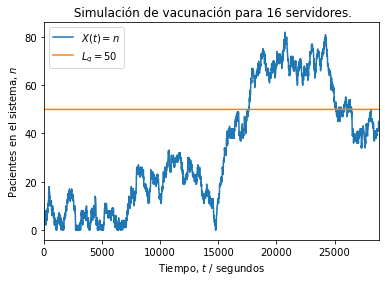

In [2]:
vacunacion(16)

Parámetro lambda = 4.0
Parámetro nu = 4.0
Número de servidores = 16
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.33 horas.


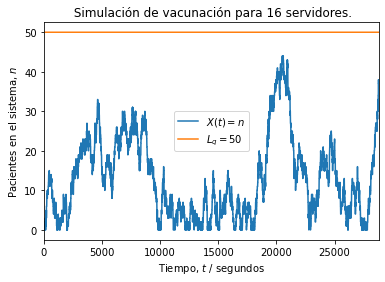

In [3]:
vacunacion(16)

Parámetro lambda = 4.0
Parámetro nu = 4.0
Número de servidores = 16
Tiempo con más de 50 solicitudes en fila:
	 66.73%
	 No cumple con la especificación.
Simulación es equivalente a 8.29 horas.


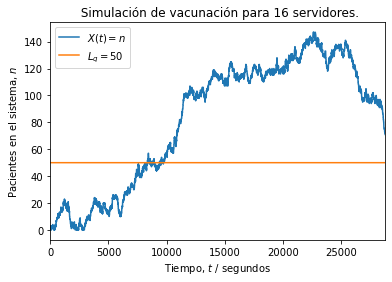

In [4]:
vacunacion(16)

Parámetro lambda = 4.0
Parámetro nu = 4.25
Número de servidores = 17
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.01 horas.


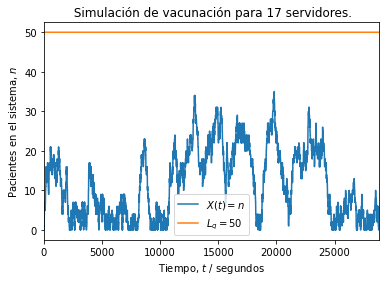

In [5]:
vacunacion(17)

Parámetro lambda = 4.0
Parámetro nu = 4.25
Número de servidores = 17
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.23 horas.


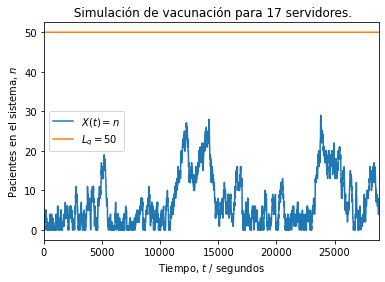

In [6]:
vacunacion(17)

Parámetro lambda = 4.0
Parámetro nu = 4.25
Número de servidores = 17
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.57 horas.


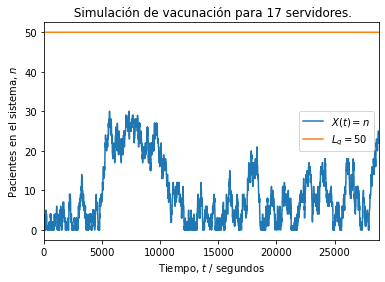

In [7]:
vacunacion(17)

Parámetro lambda = 4.0
Parámetro nu = 5.0
Número de servidores = 20
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.10 horas.


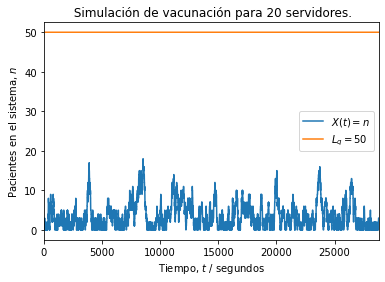

In [8]:
vacunacion(20)

### Análisis de los resultados

Observando la ejecución de la función con 16 servidores se observa que el número de pacientes excede 50 en diversos instantes de tiempo. Si nos apegamos al eneunciado, estos instantes de tiempo pueden corresponder al 5% del tiempo que se permite para que hayan más de 50 pacientes por lo que se podría afirmar que este es un resutado aceptable. Sin embargo, al ejecutar la simulación en repetidas ocasiones podemos ogbservar que no se puede garantizar que el 100% de las veces se cumplirá con el requesito solicitado, entonces se pueden descartar los 16 servidores. Por otro lado, se observa que para 17 servidores el número de pacientes presentes en todo momento es menor a 50, por lo que es posible concluir que el valor calculado para los servidores fue correcto y en este caso tenemos un funcionamiento ideal.

Agregar más servidores disminuye el número de pacientes de manera general, pero esto requiere una mayor inversión y por lo tanto no es recomendable.

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---